In [158]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [159]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [160]:
#observable = 'dphi'
observable = 'jetpt'
#observable = 'qt'
#observable = 'jeteta'

symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

y = {} 
x = {} 
xerr = {}

altmc = 'Rapgap'
mc = 'Django'
names = {}
names['nominal'] = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,mc)
names['sys0']    = 'outputfiles/CrossSection_%s_%s_sys_0_ep0607_data_nominal.npy'%(observable,mc)
names['sys1']   =  'outputfiles/CrossSection_%s_%s_sys_1._ep0607_data_nominal.npy'%(observable,mc)
#names['sys4']   =  'outputfiles/CrossSection_%s_%s_sys_6_ep0607_data_nominal.npy'%(observable,mc)
names['sys5']   =  'outputfiles/CrossSection_%s_%s_sys_5_ep0607_data_nominal.npy'%(observable,mc)

#names['sys10']    = 'outputfiles/CrossSection_%s_%s_sys_10_ep0607_data_nominal.npy'%(observable,mc)
names['sys11']    = 'outputfiles/CrossSection_%s_%s_sys_11_ep0607_data_nominal.npy'%(observable,mc)
names['model']   = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,altmc)


label = {}
label['test'] = 'repeat'
label['sys0'] = 'HFS scale (in jet)'
label['sys1'] = 'HFS scale (remainder)'
label['sys4'] = 'HFS polar angle'
label['sys5'] = 'HFS azimuthal angle'
label['sys7'] = 'Lepton energy scale'
label['sys10'] = 'Lepton polar angle'
label['sys11'] = 'Lepton azimuthal angle'

label['model'] = 'Model'
#names['sys10']   =  'CrossSection_jetpt_Django_nominal_em0405_data_nominal.npy'

In [161]:

for key in names.keys():
    with open('%s'%names[key], 'rb') as f:
        print(key)
        y[key] = np.load(f)
        x[key] = np.load(f)

        xerr[key] = np.load(f)
        print('y = ',y[key])
        print('x = ', x[key])
        #print(xerr[key])

nominal
y =  [1.05495503e-01 4.73273431e-02 1.24763775e-02 2.74709269e-03
 5.70423298e-04 8.66116768e-05]
x =  [12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]
sys0
y =  [1.06087308e-01 4.64585023e-02 1.26283130e-02 2.78557271e-03
 6.09268211e-04 9.45609092e-05]
x =  [12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]
sys1
y =  [1.05503422e-01 4.72271749e-02 1.26193020e-02 2.73206370e-03
 5.48185973e-04 8.39591073e-05]
x =  [12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]
sys5
y =  [1.04133290e-01 4.70753950e-02 1.29796231e-02 2.87683989e-03
 6.02058596e-04 9.99212833e-05]
x =  [12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]
sys11
y =  [1.06134107e-01 4.64691798e-02 1.25815025e-02 2.84772807e-03
 5.88818505e-04 8.52762909e-05]
x =  [12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]
model
y =  [1.03243997e-01 4.75808682e-02 1.30839812e-02 2.86795948e-03
 5.99300959e-0

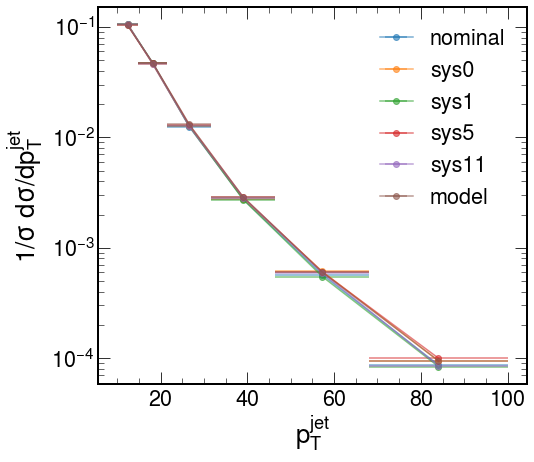

In [162]:
fig,ax = plt.subplots(figsize=(8,7))
for key in names.keys():
    plt.errorbar(x[key],y[key],xerr=xerr[key],fmt='o-',label=key,alpha=0.6)
    plt.yscale('log')
    #plt.xscale('log')
    
    plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

plt.tight_layout()
fig.savefig('figures/Systematic uncertainties_variations_%s.png'%observable)


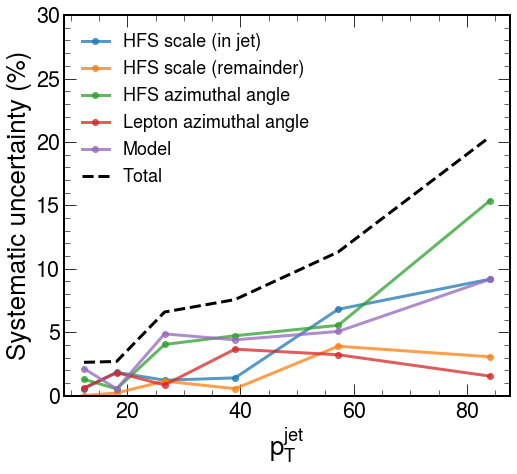

In [163]:
fig,ax = plt.subplots(figsize=(8,7))

total = np.zeros(len(y['nominal']))
ratio = {}

for key in y.keys():
    if 'nominal' in key:continue
    ratio[key] = np.divide(y[key],y['nominal']) -1
    total += ratio[key]*ratio[key]
    plt.plot(x['nominal'],100*abs(ratio[key]),'o-',label=label[key],lw=3,alpha=0.75)

total = np.sqrt(total)
N      = np.multiply( y['nominal'], xerr['nominal']*2.0)
#plt.plot(x['nominal'],100*np.sqrt(1/N), 'o--',label = 'stat error ',lw=3)
plt.plot(x['nominal'],100*total, '--',label = 'Total',lw=3,color='k')

plt.ylabel('Systematic uncertainty (%)')
plt.legend(loc='best',fontsize=18)
plt.xlabel(symbol[observable])
#plt.xscale('log')
plt.ylim([0,30])
plt.show()


fig.savefig('figures/Systematic uncertainties_%s.png'%observable)


In [164]:
up = np.multiply(y['nominal'],(1+total))
do = np.multiply(y['nominal'],(1-total))

errory = np.subtract(up,do)
print (errory)
print (x['nominal'])
print (y['nominal'])

print (xerr['nominal'])

[5.54364941e-03 2.55273594e-03 1.64560216e-03 4.16063370e-04
 1.29252017e-04 3.53372731e-05]
[12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]
[1.05495503e-01 4.73273431e-02 1.24763775e-02 2.74709269e-03
 5.70423298e-04 8.66116768e-05]
[ 2.33899634  3.43317711  5.03921485  7.39655587 10.85665928 15.93539655]


In [165]:
help(make_error_boxes)

Help on function make_error_boxes in module __main__:

make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r', edgecolor='None', alpha=0.5)



In [166]:
print(symbol[observable])

$p_{T}^{jet}$


No handles with labels found to put in legend.


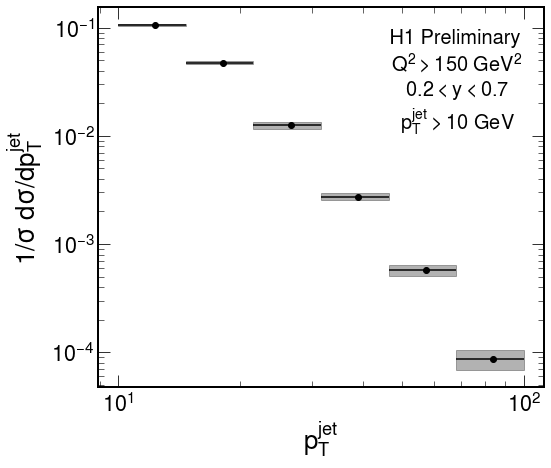

<Figure size 720x720 with 0 Axes>

In [167]:
fig,ax = plt.subplots(figsize=(8,7))

#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

xposition = 0.2
if 'jetpt' in observable:
    xposition = 0.8
if 'qt' in observable:
    xposition = 0.8
if 'eta' in observable:
    xposition = 0.8
    
plt.text(xposition, 0.8,' H1 Preliminary \n $Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)

#plt.title('H1 Preliminary')
if 'dphi' in observable:
    plt.yscale('log')
if 'eta' in observable:
    print ('eta')

if 'jetpt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    
if 'qt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    
if 'eta' in observable:
    plt.ylim(bottom=0.0)
    
for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')
plt.show()
plt.tight_layout()

fig.savefig('figures/FinalResult_%s.png'%observable)